In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [2]:
#!pip install tensorflow==2.5.0

# Multiple Layer LSTM

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print(tf.test.is_built_with_cuda())

2.5.0
/device:GPU:0
True


In [4]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [5]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 141s 347ms/step - loss: 0.5943 - accuracy: 0.6784 - val_loss: 0.6526 - val_accuracy: 0.5996
Epoch 2/10
391/391 [==============================] - 134s 343ms/step - loss: 0.4592 - accuracy: 0.7930 - val_loss: 0.4934 - val_accuracy: 0.7860
Epoch 3/10
391/391 [==============================] - 132s 338ms/step - loss: 0.3715 - accuracy: 0.8440 - val_loss: 0.4487 - val_accuracy: 0.8010
Epoch 4/10
391/391 [==============================] - 130s 332ms/step - loss: 0.4477 - accuracy: 0.7714 - val_loss: 0.6394 - val_accuracy: 0.6089
Epoch 5/10
391/391 [==============================] - 130s 333ms/step - loss: 0.5405 - accuracy: 0.7162 - val_loss: 0.6409 - val_accuracy: 0.6595
Epoch 6/10
391/391 [==============================] - 131s 335ms/step - loss: 0.4681 - accuracy: 0.7846 - val_loss: 0.4632 - val_accuracy: 0.8058
Epoch 7/10
391/391 [==============================] - 131s 335ms/step - loss: 0.2765 - accuracy: 0.8910 - val_loss: 0.3897 -

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

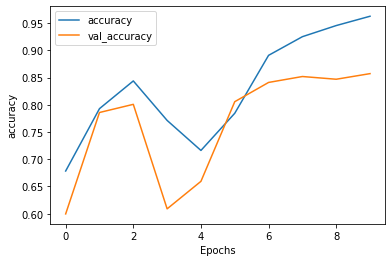

In [12]:
plot_graphs(history, 'accuracy')

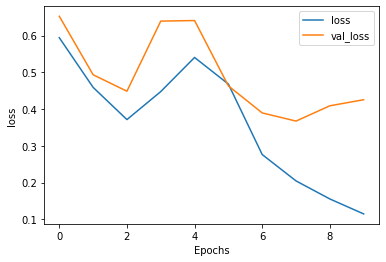

In [13]:
plot_graphs(history, 'loss')